https://towardsdatascience.com/https-towardsdatascience-com-resampling-methods-for-unbalanced-datasets-5b565d0a247dµ

https://www.kaggle.com/mlg-ulb/creditcardfraud/data#

In [19]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv( 'J:\\MyFiles\\_Fabrice\\datascience\\data\\creditcard.csv' )

In [5]:
df.head( 5 )

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

# Proportion d'enregistrements pour chaque classe

In [10]:
100 * ( df[ 'Class' ].value_counts() / df.shape[0] )

0    99.827251
1     0.172749
Name: Class, dtype: float64

# Préparation des données : df -> X , y

In [15]:
def prep_data( df ) : 

 # Récupération de toutes les lignes, les colonnes 1 à 29 ( variables explicatives )
 X = df.iloc[: , 1:29].values
 
 X = np.array(X).astype( np.float )
 
 # Récupération de toutes les lignes, de la colonne 30 ( variable à expliquer )
 y = df.iloc[: , 30 ].values

 y = np.array( y ).astype( np.float )
 
 return X  , y

In [16]:
X , y = prep_data( df )

# Scatter plot paire de variables explicatives pour chaque classe

In [28]:
def plot_data( X , y , num_col_x , num_col_y ) :

 # X : matrice variables explicatives
 # y : vecteur variable à expliquer
 # num_col_x : numéro de la colonne de X pour abscisse
 # num_col_y : numéro de la colonne de X pour ordonnée

 plt.scatter( X[ y == 0 , num_col_x ] , X[ y == 0 , num_col_y ] , label = 'class #0' , alpha = 0.5 , linewidth = 0.15 , color = 'blue' )
  
 plt.scatter( X[ y == 1 , num_col_x ] , X[ y == 1 , num_col_y ] , label = 'Class #1' , alpha = 0.5 , linewidth = 0.15 , color ='red' )
 
 plt.legend()
 
 return plt.show()

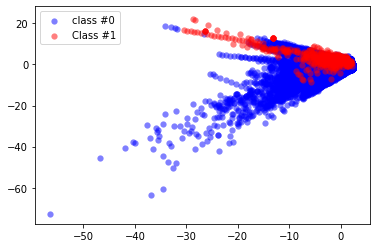

In [29]:
plot_data( X , y , 0 , 1 )

# SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smo = SMOTE( kind = 'regular' )

In [32]:
X_resamp , y_resamp = smo.fit_sample( X , y )

In [33]:
X.shape

(284807, 28)

In [34]:
X_resamp.shape

(568630, 28)

In [36]:
y.sum()

492.0

In [37]:
y_resamp.sum()

284315.0

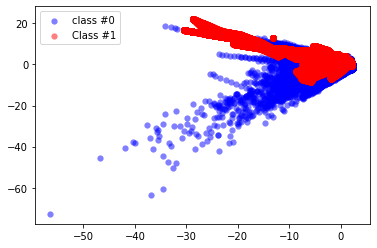

In [35]:
plot_data( X_resamp , y_resamp , 0 , 1 )